# NumPy

This course introduces NumPy for scientific computing.

## Part 4: Images

Images in computers are naturally ndarrays, typically, the first dimension of the shape is the `rows`, the second dimension is the `columns`, and the third dimension are the `bands`.

(10, 20)


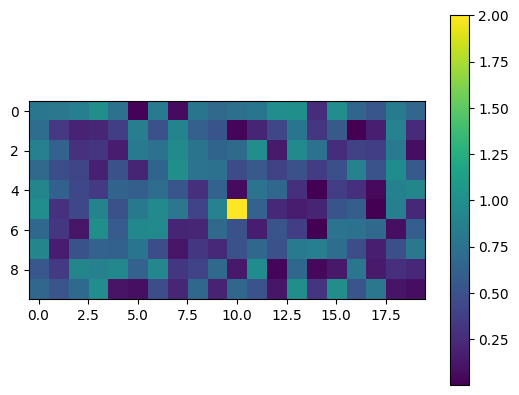

In [4]:
import numpy as np
from matplotlib import pyplot as plt

# create an image of 10x20
image = np.random.rand(20*10).reshape(10,-1)
print(image.shape)

# colorize some pixels
image[5,10] = 2
image[6,10] = 0.5

# plot image
plt.imshow(image)
plt.colorbar()
plt.show()

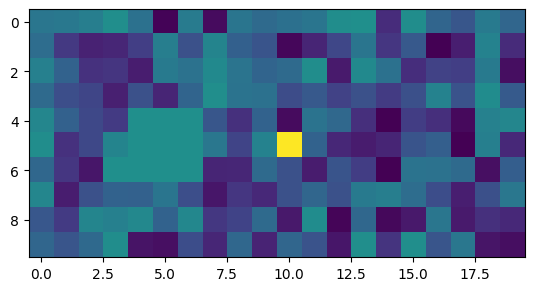

In [5]:
# color an area
image[4:7,4:7] = np.ones(3*3).reshape(3,-1)
plt.imshow(image)

(100, 200, 3)


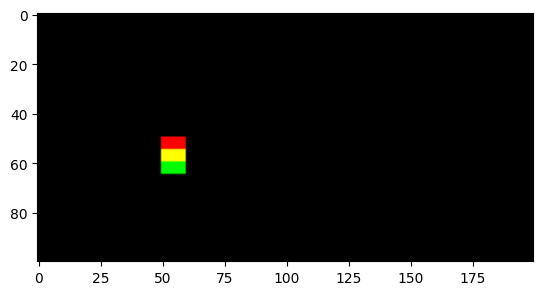

In [6]:
# create an RGB image with 100 rows, 200 columns, 3 colors
image = np.zeros(100 * 200 * 3).reshape(100, 200, -1).astype(np.uint8)
print(image.shape)

# unsigned integer of 8 bit (np.uint8) = 0..255
# the default color depth of images on screen

# colorize some patches
image[50:60, 50:60, 0] = 255 * (np.ones(10 * 10).reshape(10, -1))
image[55:65, 50:60, 1] = 255 * (np.ones(10 * 10).reshape(10, -1))

# plot
plt.imshow(image)
plt.show()

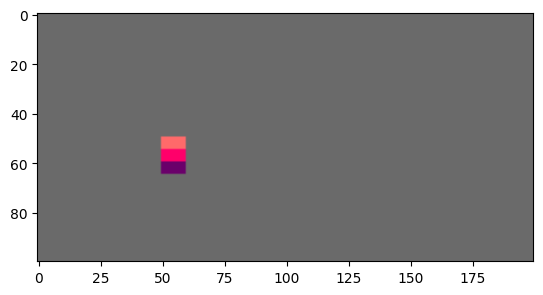

In [17]:
# same as above with floats
image = np.zeros(100*200*3).reshape(100,200,-1).astype(np.float32) 

image[50:60,50:60,0] = 14*(np.ones(10*10).reshape(10,-1)) 
image[55:65,50:60,1] = -10*(np.ones(10*10).reshape(10,-1))

#
# How do we ensure, the matrix is scaled linearily (looks good), but is in [0,1]
#
image = image - np.min(image)
image = image / np.max(image)


plt.imshow(image)
# remember: either cast images into np.uint8 or prepare them into [0,1] for all channels

### Example: normalize by layer

Sometimes images have strange value ranges. For deep learning one often wants to normalize to the range `[0,1]`. Linear normalization can be performed with the following formula:

$$I_{N}=(I-{\text{Min}}){\frac {{\text{newMax}}-{\text{newMin}}}{{\text{Max}}-{\text{Min}}}}+{\text{newMin}}$$

(100, 200, 3)
[6 0 0]
[63995 63998 63995]
Range: 0.000000 -- 1.000000


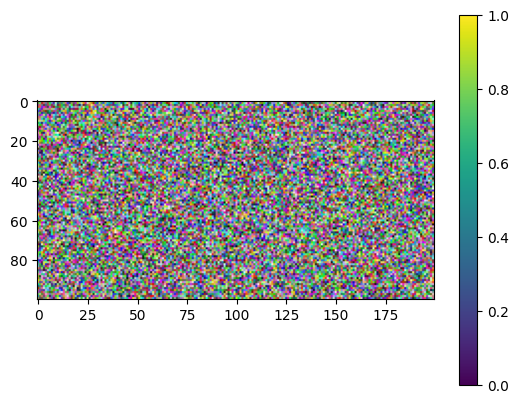

In [18]:
# some noise
image = np.random.randint(0, 64000, size=(100, 200, 3))
print(image.shape)

# normalize
new_min = 0
new_max = 1

band_min = np.amin(image, axis=(0,1))
print(band_min)
band_max = np.amax(image, axis=(0, 1))
print(band_max)

image = (image - band_min) * ((new_max - new_min) / (band_max - band_min) + new_min)

# plot
print("Range: %f -- %f" % (np.min(image), np.max(image)))
plt.imshow(image)
plt.colorbar()